## NLP Workspace

In [5]:
import numpy as np
import pandas as pd
import gensim

In [7]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv' , sep='\t')

#### Count Vectorizer / Bag of Words

In [8]:
## Count Vectorizer (Bag of Words method)

from sklearn.feature_extraction.text import CountVectorizer
rows_10 = train.iloc[1:11]
text = rows_10['item_description'] 
vectorizer = CountVectorizer()
vectorizer.fit(text)       ## Building the vocabulary of rows 1-10 (item_description columns)
encoded_dict = {k: v for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda item: item[1])}  ##Sorting by values
print(encoded_dict)

{'10': 0, '100': 1, '27': 2, '36c': 3, '38': 4, '85': 5, 'about': 6, 'all': 7, 'and': 8, 'are': 9, 'attachments': 10, 'authentic': 11, 'be': 12, 'bit': 13, 'both': 14, 'box': 15, 'bra': 16, 'bras': 17, 'bundles': 18, 'but': 19, 'can': 20, 'candy': 21, 'capris': 22, 'closet': 23, 'color': 24, 'condition': 25, 'cut': 26, 'cute': 27, 'deposit': 28, 'description': 29, 'do': 30, 'don': 31, 'either': 32, 'faded': 33, 'for': 34, 'gentle': 35, 'get': 36, 'gold': 37, 'good': 38, 'green': 39, 'have': 40, 'in': 41, 'is': 42, 'it': 43, 'jean': 44, 'just': 45, 'keychain': 46, 'lasts': 47, 'left': 48, 'leg': 49, 'lighting': 50, 'like': 51, 'limited': 52, 'little': 53, 'look': 54, 'looking': 55, 'make': 56, 'me': 57, 'message': 58, 'miss': 59, 'multi': 60, 'my': 61, 'navy': 62, 'new': 63, 'no': 64, 'not': 65, 'of': 66, 'old': 67, 'once': 68, 'one': 69, 'only': 70, 'out': 71, 'pair': 72, 'pictures': 73, 'pink': 74, 'product': 75, 'really': 76, 'rubber': 77, 'sexy': 78, 'shoe': 79, 'silicone': 80, 'siz

In [9]:
vector = vectorizer.transform(text)     ## Encoding the text (rows 1:10)
print(vector.toarray())     ## Encoded vector

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [1 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


#### TF-IDF method

In [10]:
## Applying TF-IDF for first 10 rows of item_description column
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_TFIDF = TfidfVectorizer()
vectorizer_TFIDF.fit(text)     ## Building vocabulary by TF-IDF
encoded_dict2 = {k: v for k, v in sorted(vectorizer_TFIDF.vocabulary_.items(), key=lambda item: item[1])} 
print(encoded_dict2)

{'10': 0, '100': 1, '27': 2, '36c': 3, '38': 4, '85': 5, 'about': 6, 'all': 7, 'and': 8, 'are': 9, 'attachments': 10, 'authentic': 11, 'be': 12, 'bit': 13, 'both': 14, 'box': 15, 'bra': 16, 'bras': 17, 'bundles': 18, 'but': 19, 'can': 20, 'candy': 21, 'capris': 22, 'closet': 23, 'color': 24, 'condition': 25, 'cut': 26, 'cute': 27, 'deposit': 28, 'description': 29, 'do': 30, 'don': 31, 'either': 32, 'faded': 33, 'for': 34, 'gentle': 35, 'get': 36, 'gold': 37, 'good': 38, 'green': 39, 'have': 40, 'in': 41, 'is': 42, 'it': 43, 'jean': 44, 'just': 45, 'keychain': 46, 'lasts': 47, 'left': 48, 'leg': 49, 'lighting': 50, 'like': 51, 'limited': 52, 'little': 53, 'look': 54, 'looking': 55, 'make': 56, 'me': 57, 'message': 58, 'miss': 59, 'multi': 60, 'my': 61, 'navy': 62, 'new': 63, 'no': 64, 'not': 65, 'of': 66, 'old': 67, 'once': 68, 'one': 69, 'only': 70, 'out': 71, 'pair': 72, 'pictures': 73, 'pink': 74, 'product': 75, 'really': 76, 'rubber': 77, 'sexy': 78, 'shoe': 79, 'silicone': 80, 'siz

In [11]:
#print(vectorizer_TFIDF.idf_)
vector_tfidf = vectorizer_TFIDF.transform(text)    ## Encoding the text
vector_tfidf.toarray()                             ## Array of TF-IDF scores of words

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.57735027,
        0.        ],
       [0.28816633, 0.28816633, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.22711774, ..., 0.        , 0.        ,
        0.        ]])

### Glove word embedding

This is the vocabulary on which the model is trained: 
 ['C', 'o', 'l', 'r', ' ', 'i', 's', 'g', 'd', 'e', 'p', 't', ',', 'a', 'b', 'u', '8', '5', '%', 'f', 'c', 'N', 'w', 'U', 'h', 'n', 'y', 'T', 'P', 'S', 'R', 'V', 'x', 'm', 'z', '3', '6', '.', 'B', 'I', 'v', 'k', '!', 'L', ':', ')', 'O', 'Y', 'G', 'j', '1', '0', '-', 'D', "'", 'M', 'J', '2', '7']


<ipython-input-15-25af90d63d9c>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


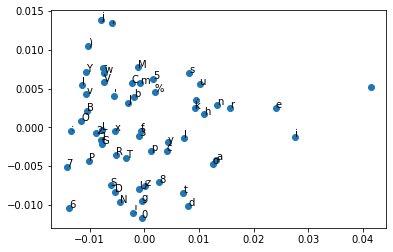

In [15]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = Word2Vec(text, min_count=1)

words = list(model.wv.vocab)
print("This is the vocabulary on which the model is trained: \n", words)

# Fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()
